## Multiple Linear Regression


### Bike Sharing Case Study

Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Company wants to know :

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [16]:
#importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [17]:
bikeSharing = pd.read_csv('day.csv')

In [18]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
bikeSharing.shape

(730, 16)

In [20]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [21]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### There are 730 rows and  16 columns in dataset with no null values in any of the columns.

## Step 2: Data Cleaning

In [22]:
#Dropping instant column as it is index column and will not have any effect on our analysis
bikeSharing.drop(columns=['instant'],inplace=True)

In [23]:
#Dropping casual and registered columns as cnt is sum of casual and registered where cnt is target variable
bikeSharing.drop(columns=['casual','registered'],inplace=True)

In [24]:
#Dropping dteday column as we can infer same data from month,year and weekday columns
bikeSharing.drop(columns=['dteday'],inplace=True) 

In [25]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Handling Missing Values 

In [26]:
bikeSharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no null values

### Handling Outliers

In [27]:
bikeSharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

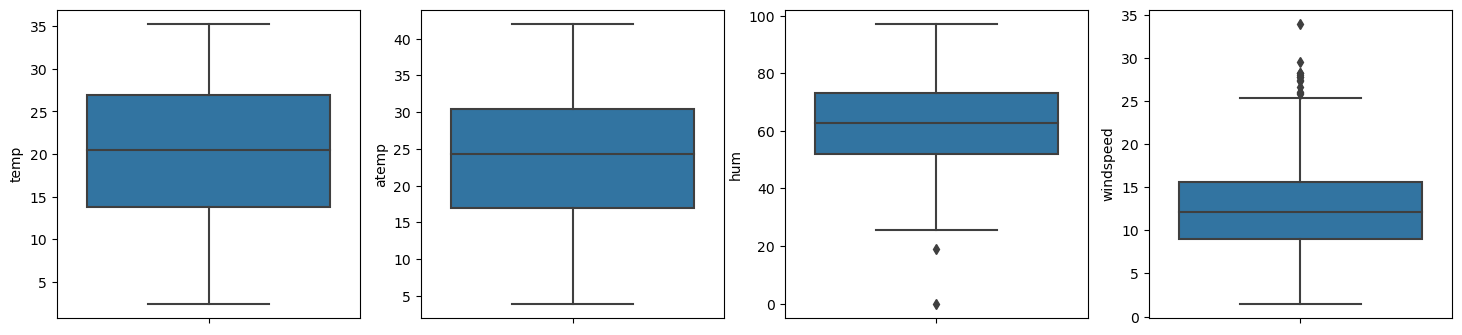

In [28]:
#Drawing box plots for continous independent variables 
columns=['temp','atemp','hum','windspeed']
plt.figure(figsize=(18,4))
i = 1
for column in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=column,data=bikeSharing)
    i+=1

#### There are no significant outliers to be handled.

### Step 3: Performing EDA 

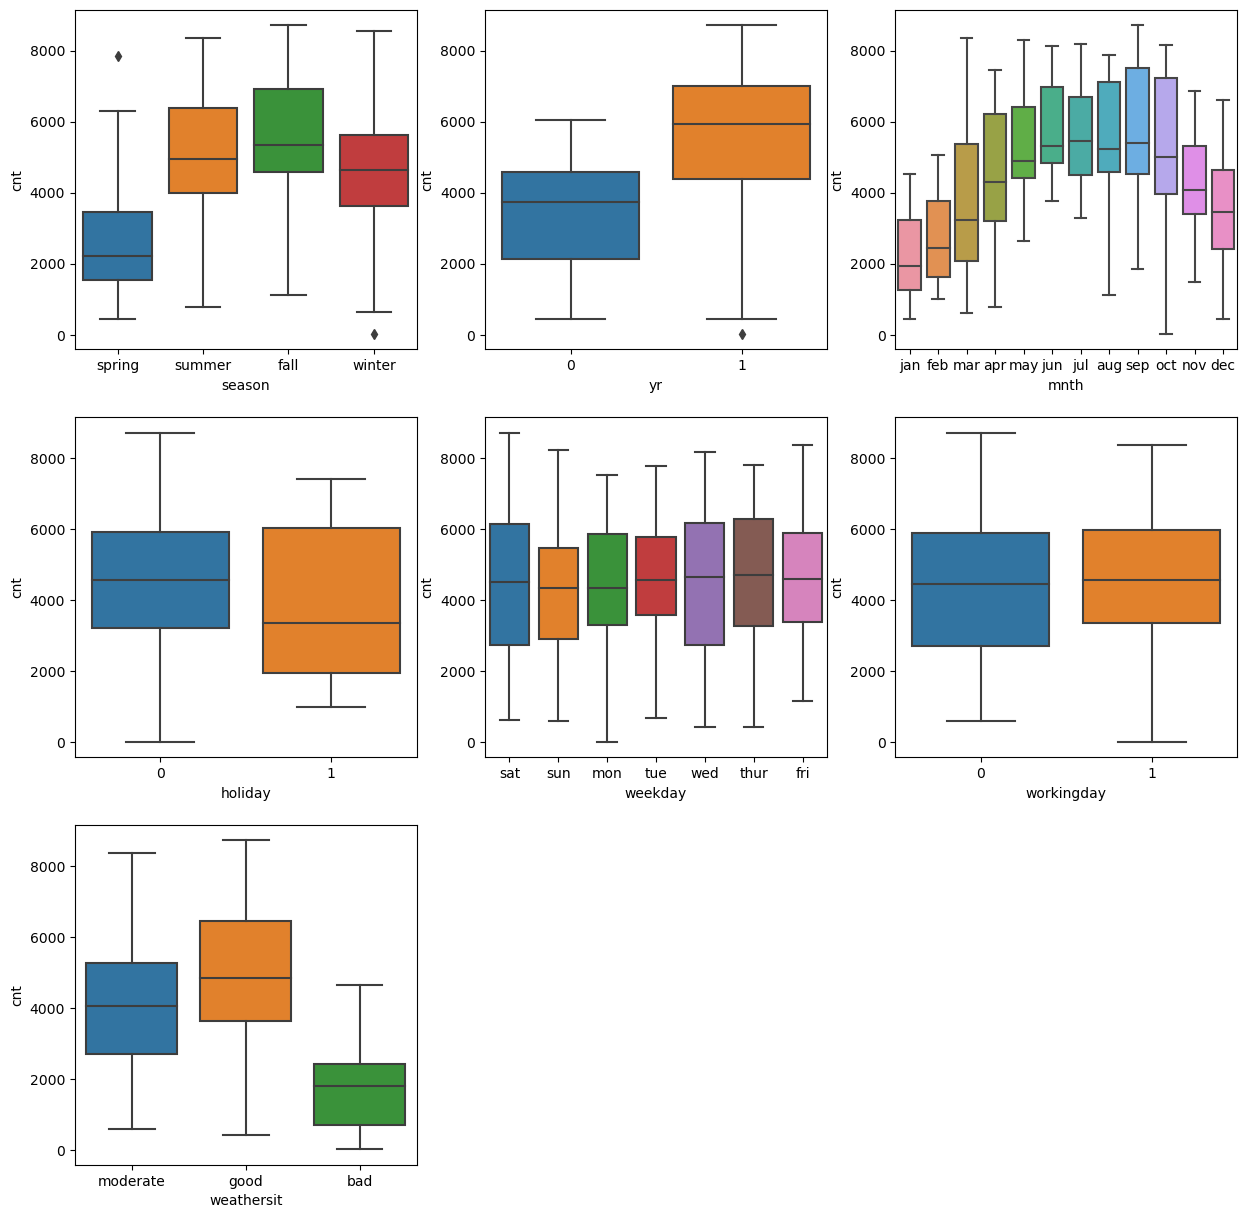

In [29]:
#Analysing categorical variables with target variable by plotting boxplot to see demands
bikeSharing.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace = True)
bikeSharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bikeSharing.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace = True)
bikeSharing.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat'},inplace = True)                        
col_categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15,15))
i=1
for col in col_categorical:
    plt.subplot(3,3,i)
    sns.boxplot(y='cnt',x=col,data=bikeSharing)
    i+=1
plt.show()


Inference:
 1. Season fall has highest influence on rental demands.
 2. 2019 had more demands as compared to previous , might follow similar trend in coming years
 3. Demand is increasing each month till june.In month of Sep, it shows hihest demands then it decreases.
 4. If there is holiday demand decreases.
 5. Weekdays shows similar pattern, doesnot imply much about demand.
 6. Weathersit - clear wethersit has higher demands for rental bikes.

<Figure size 1500x3000 with 0 Axes>

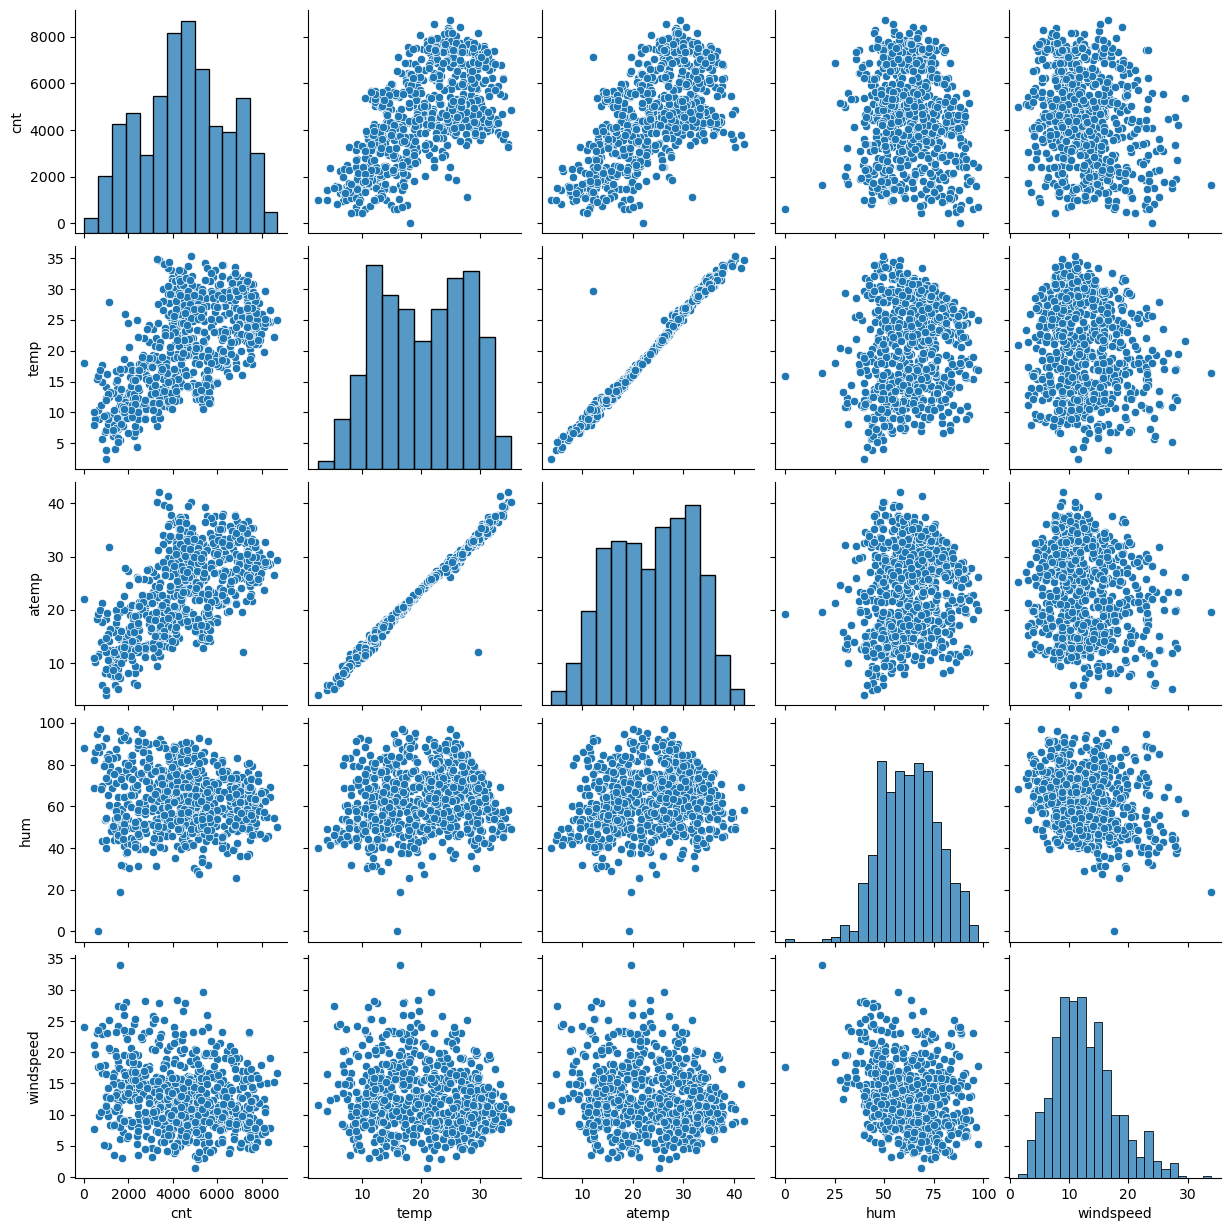

In [30]:
#Drawing pairplots to check the linear relationShip for continous variables
plt.figure(figsize=(15,30))
sns.pairplot(data=bikeSharing,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

Inference:
 1. Output variable cnt has linear relationship with temp and atemp  
 2. Independent variables temp and atemp are highly correlated with dependent variable cnt
 3. temp and atemp |are highly correlated with each other
 

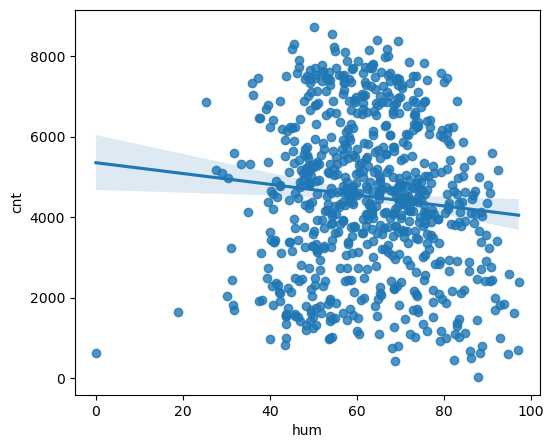

In [24]:
# Drawing linear regression plot between cnt and humidity
plt.figure(figsize=(6,5))
sns.regplot(data=bikeSharing,y="cnt",x="hum")
plt.show()

Inference:
   Hum values are more scattered around and We can see cnt decreasing with increase in humidity

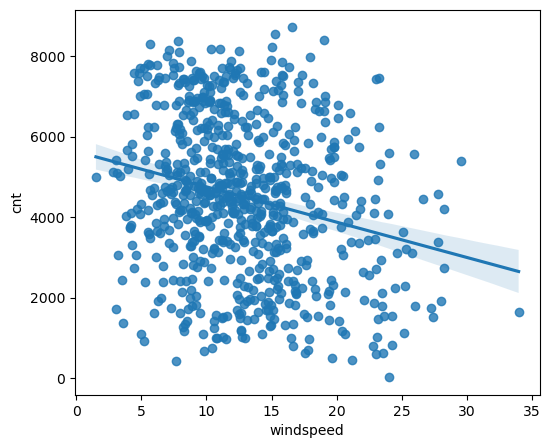

In [25]:
# Drawing linear regression plot between cnt and humidity
plt.figure(figsize=(6,5))
sns.regplot(data=bikeSharing,y="cnt",x="windspeed")
plt.show()

Inference:
    1. cnt is decreasing with increase in windspeed

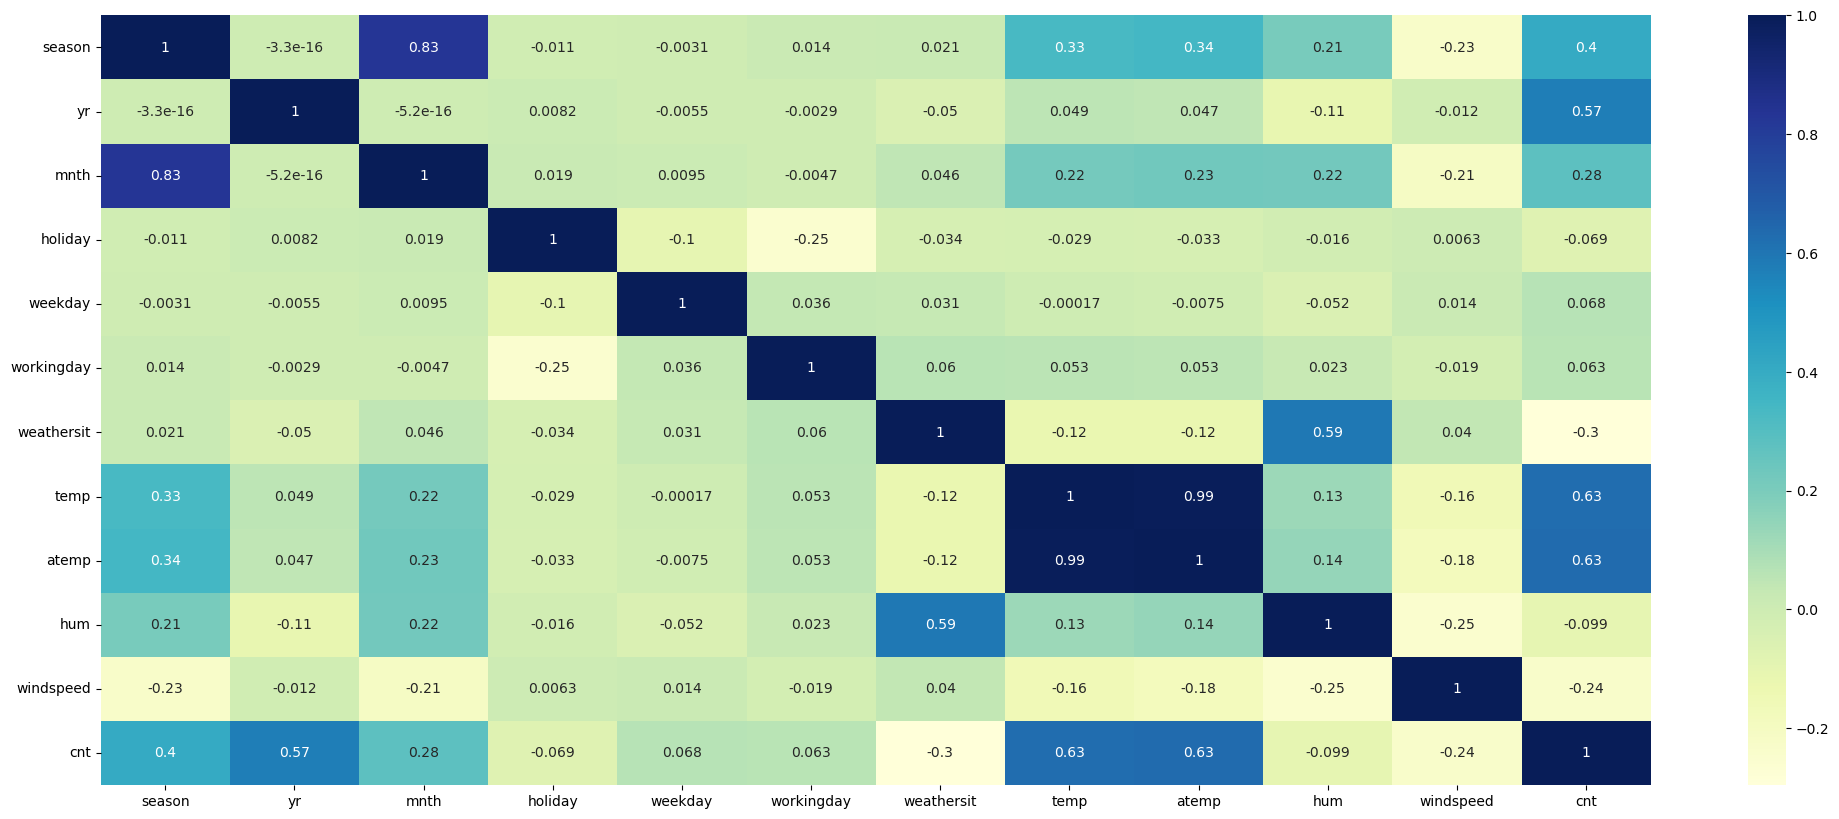

In [21]:
#Drawing heatmap to find correlation between variables
plt.figure(figsize=(25,10))
sns.heatmap(bikeSharing.corr(),annot=True,cmap='YlGnBu')
plt.show()

Inference: We can see that temp and atemp are highly correlated (o.99 ~ 1). Only one variable should be considered for model building, which can be eliminated based on VIF

## Step 4: Data preparation 

### Dummy variables

Creating dummy variables for all categorical values


In [31]:
#Dropping first column as n-1 explains n categories
bikeSharing = pd.get_dummies(data=bikeSharing,columns=["season","mnth","weekday"],drop_first=True)

In [32]:
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thur',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [34]:
bikeSharing = pd.get_dummies(data= bikeSharing,columns=["weathersit"])
#Note:Not dropping first column to get more information on severe weather conditions

In [35]:
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [36]:
bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


## step 5: Model Building

Splitting the Data into Training and Testing Sets

In [37]:
y = bikeSharing.pop("cnt")

In [38]:
X = bikeSharing

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [40]:
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


Rescaling the features

In [41]:
#Scale continous variables
num_vars = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
X_train[num_vars] =scaler.fit_transform(X_train[num_vars])

In [42]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### Model Building using RFE 

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 15),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thur', False, 16),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [45]:
#Function to build model using statsmodel
def build_model_stats(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm=sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

In [46]:
#Function to calculate VIF
def get_vif(cols):
    df1 = X_train[cols]
    vif=pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    return vif.sort_values(by = 'VIF',ascending=False)

### Model building -starting with all variables selected by RFE\

In [47]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [48]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [90]:
build_model_stats(X_train_rfe.columns)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          7.31e-192
Time:                        13:35:58   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 922.5989    

In [100]:
get_vif(X_train_rfe.columns)


,Features,VIF
13,weathersit_good,51.66
14,weathersit_moderate,34.35
6,season_spring,5.02
12,weathersit_bad,4.41
3,temp,3.62
8,season_winter,3.50
7,season_summer,2.62
4,hum,1.91
2,workingday,1.88
11,weekday_sat,1.78


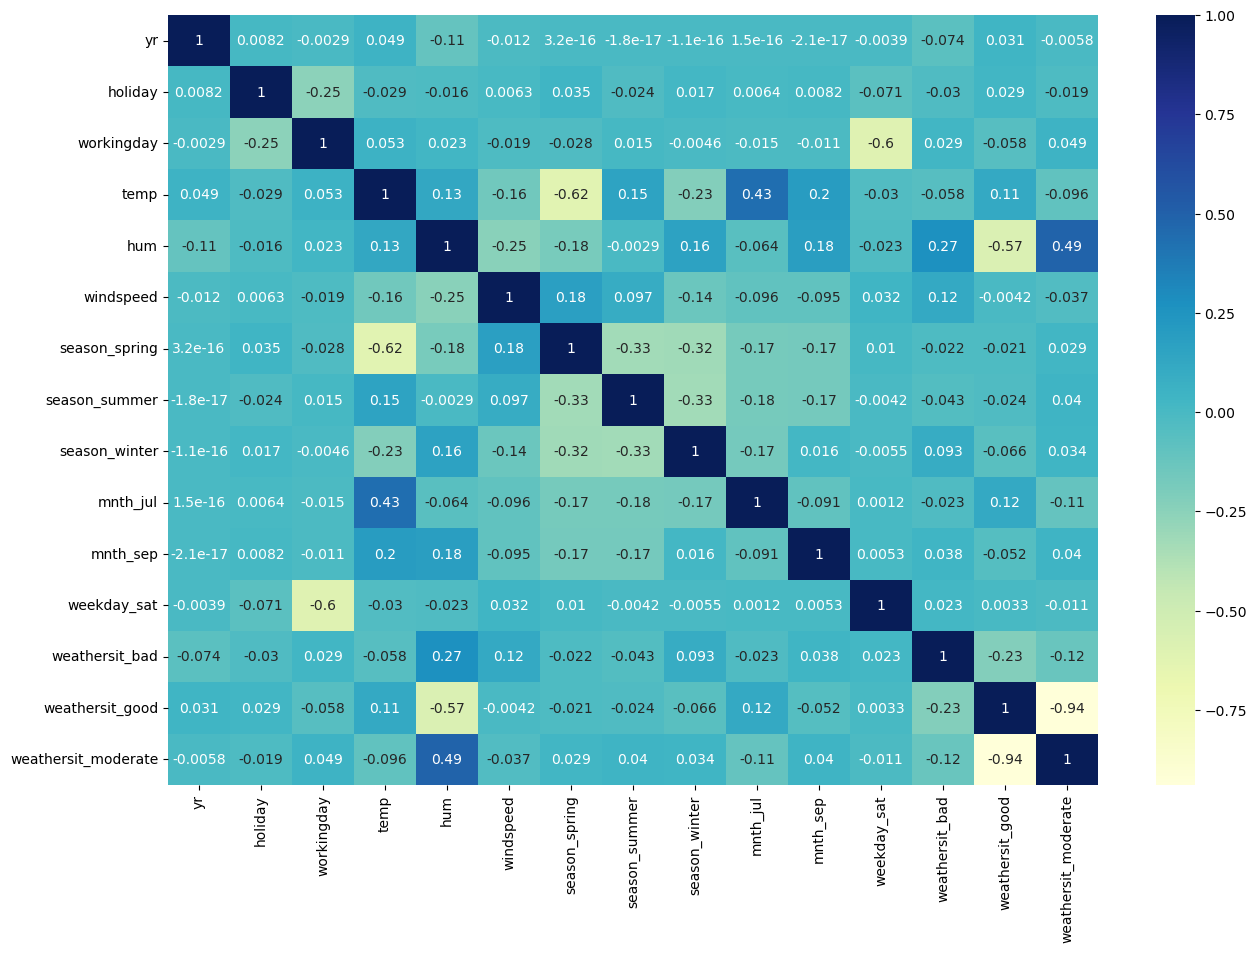

In [113]:
#checking the correlation of all features selected
corr =  bikeSharing[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

### Updating the model and dropping columns

In [101]:
#Checking p-values , all variables have p value >0.05 . so considering Vif both weathersit_good and weathersit_moderate are having high VIF.So to start with dropping weathersit_good
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [49]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
build_model_stats(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          7.31e-192
Time:                        18:47:56   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2105.3594    

,Features,VIF
4,hum,28.48
3,temp,17.00
2,workingday,5.30
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.44
7,season_summer,2.85
13,weathersit_moderate,2.28
0,yr,2.09
11,weekday_sat,1.97


## Updating the model and dropping column

In [50]:
#Dropping humidity hum as it has higher VIF
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
build_model_stats(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          4.84e-189
Time:                        18:49:54   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1382.9821    

,Features,VIF
3,temp,6.98
2,workingday,5.22
4,windspeed,4.66
5,season_spring,2.49
6,season_summer,2.34
0,yr,2.07
7,season_winter,1.99
10,weekday_sat,1.96
8,mnth_jul,1.58
12,weathersit_moderate,1.57


In [52]:
#Dropping workingday due to high vif and retaining temp as it was linearly related with target variable
cols = ['yr', 'holiday', 'windspeed','temp',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
build_model_stats(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          7.37e-187
Time:                        18:57:36   Log-Likelihood:                -4134.3
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     498   BIC:                             8350.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1720.0299    

,Features,VIF
3,temp,5.13
2,windspeed,4.63
5,season_summer,2.23
4,season_spring,2.10
0,yr,2.07
6,season_winter,1.80
7,mnth_jul,1.58
11,weathersit_moderate,1.55
8,mnth_sep,1.34
9,weekday_sat,1.19


### Updating the model and dropping variables

In [56]:
#Dropping weekday_sat as it has p value greater than 0.05 and is insignificant.
cols =[ 'yr', 'holiday', 'windspeed','temp','season_spring', 'season_summer', 'season_winter', 'mnth_jul','mnth_sep','weathersit_bad', 'weathersit_moderate']
build_model_stats(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.09e-187
Time:                        18:59:51   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1749.8251    

,Features,VIF
3,temp,5.10
2,windspeed,4.61
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.79
7,mnth_jul,1.58
10,weathersit_moderate,1.55
8,mnth_sep,1.34
9,weathersit_bad,1.08


In [57]:
#Dropping mnth_jul as mnth_jul and temp are highly correlated.And verifying p values and r-squared  
cols =[ 'yr', 'holiday', 'windspeed','temp','season_spring', 'season_summer', 'season_winter','mnth_sep','weathersit_bad', 'weathersit_moderate']
build_model_stats(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          6.20e-187
Time:                        19:01:33   Log-Likelihood:                -4139.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     500   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1674.8338    

,Features,VIF
2,windspeed,4.60
3,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_moderate,1.55
7,mnth_sep,1.23
8,weathersit_bad,1.08
1,holiday,1.04


## Now as we see both vif( below 5)  and p value (~ 0) are within acceptable range.Also R2 is 0.83. Using this model as final model for predictions as all important statistics are high(R- square,adjusted R-squared and F statistics) along with no insignificant variables and no multi collinear variables( high VIF).

#### Building the model with selected columns using linear regression

In [59]:
cols =[ 'yr', 'holiday', 'windspeed','temp','season_spring', 'season_summer', 'season_winter','mnth_sep','weathersit_bad', 'weathersit_moderate']
lr = LinearRegression()
lr.fit(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1674.83376879583 [ 2039.79915906  -841.5232874  -1286.40089106  4158.72072731
  -478.21087022   540.88594254   834.04425842   789.43602661
 -2483.68386804  -688.49600247]


## Step 6: Model evaluation


### Residual Analysis of the train data

In [62]:
X_train_lm = X_train[cols]
y_train_pred = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

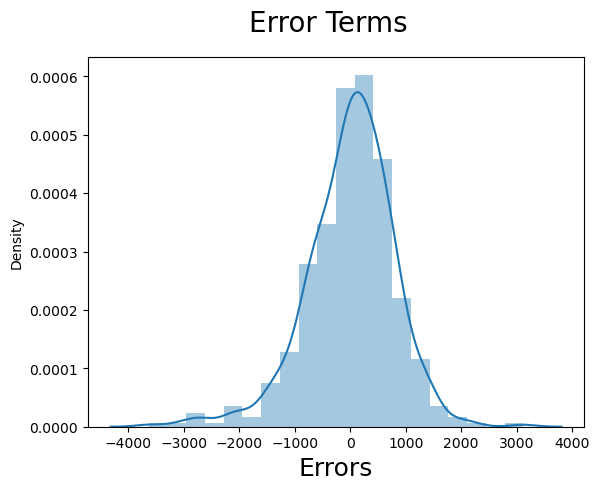

In [63]:
 #plot histogram of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

#### Inference: Errors are normally distributed with mean 0.

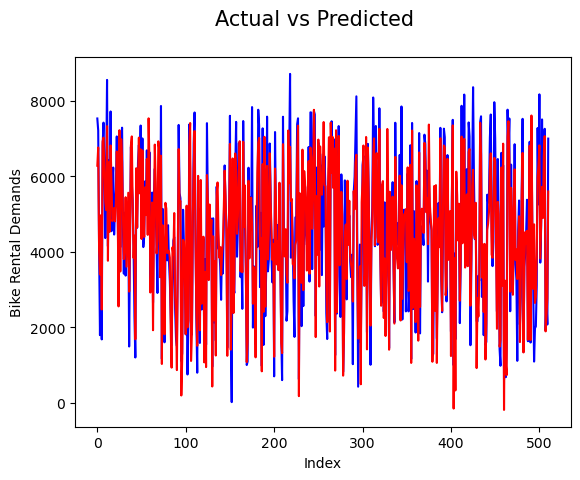

In [66]:
# Actual vs Predicted for train data

c= [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train,color="blue")
plt.plot(c,y_train_pred,color="red")
plt.suptitle('Actual vs Predicted',fontsize=15)
plt.xlabel('Index')
plt.ylabel('Bike Rental Demands')
plt.show()

Inference: Actual and predicted result follow almost same pattern

In [67]:
r2_score(y_train,y_train_pred)

0.832689927245098

Inference: R2 same as we obtained for final model using stats model.

### Linearity check

Text(0, 0.5, 'y_train')

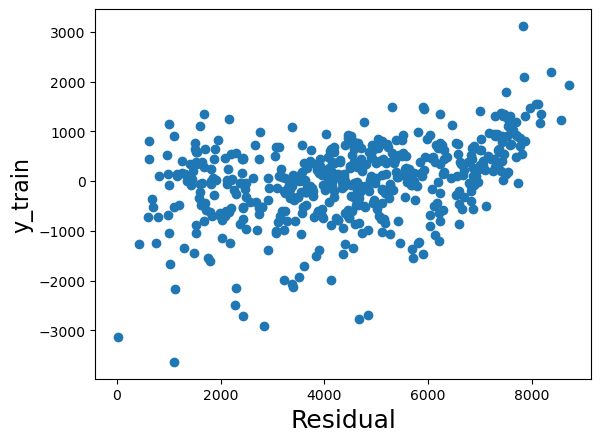

In [68]:
fig = plt.figure()
residual = y_train-y_train_pred
plt.scatter(y_train, residual)              
plt.xlabel('Residual', fontsize = 18)                         
plt.ylabel('y_train', fontsize = 16)  

### Predict values for test data

In [70]:
#Scale variables in X_test
num_vars =['temp','atemp','hum','windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [71]:
#Columns selected for final model
cols =[ 'yr', 'holiday', 'windspeed','temp','season_spring', 'season_summer', 'season_winter','mnth_sep','weathersit_bad', 'weathersit_moderate']
y_test_pred = lr.predict(X_test[cols])

###  R-Squared value for test prediction

In [72]:
r2_score(y_test,y_test_pred)

0.803655907770052

Inference:Since R-squared is 0.803 , we can infer it is performing good with unseen data(test data).


Text(0, 0.5, 'y_pred')

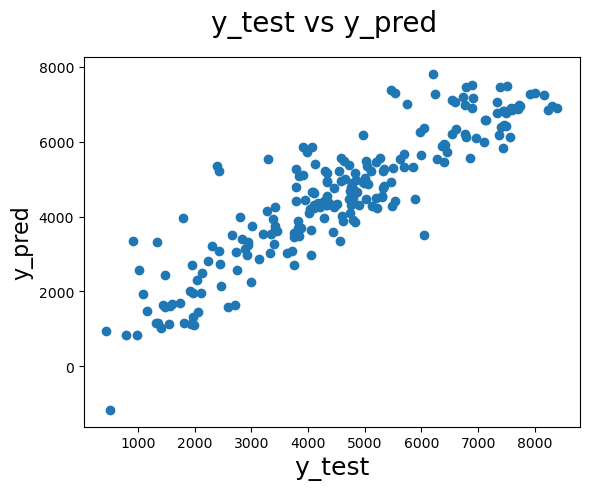

In [73]:
#plotting y_test and y_test_pred to understand spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

We observe variance of residuals is constant.

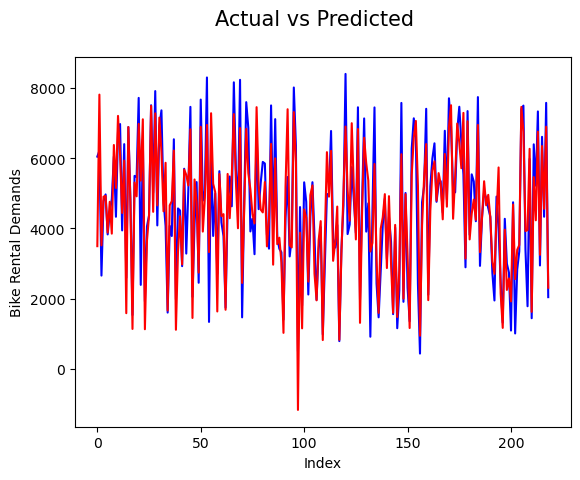

In [75]:
# Actual vs Predicted for test data

c= [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test,color="blue")
plt.plot(c,y_test_pred,color="red")
plt.suptitle('Actual vs Predicted',fontsize=15)
plt.xlabel('Index')
plt.ylabel('Bike Rental Demands')
plt.show()

## Interpretations of results

1. Based on previous years data, it is expected that there will be more number of users once situation comes to normal compared to 2019.
2. Company should focus on expanding business during weekdays as compared to holidays.\
3. As windspeed goes high , demand reduces.Also demand will be less during light snow or Heavy rain.Company should utilize this time for bike services without having much impact.
4. Company should focus on expanding bussiness during spring and in month of september should provide more offers as this time there is hike in the demand.

Hence when situation comes back to normal , company should come up with new offers in spring when weather is pleasant and also adverstise little for sepetember as this is when rental demands are high.

### Significant variables in predicting the demand for shared bikes.

1. year(2019)               
2. holiday             
3. windspeed           
4. temp                 
5. season_spring       
6. season_summer         
7. season_winter         
8. mnth_sep              
9. weathersit_bad      
10. weathersit_moderate  